# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [7]:
df.head()

Country (region)            156
Ladder                      156
SD of Ladder                156
Positive affect             155
Negative affect             155
Social support              155
Freedom                     155
Corruption                  148
Generosity                  155
Log of GDP\nper capita      152
Healthy life\nexpectancy    150
dtype: int64

In [13]:
df['Freedom'].min()

1.0

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

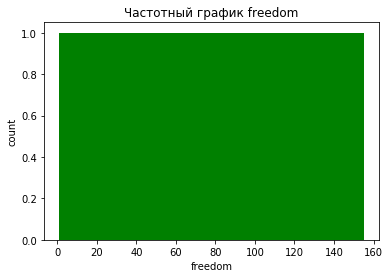

In [38]:
n, bins, patches = plt.hist(df['Freedom'], 155, facecolor='g')

plt.xlabel('freedom')
plt.ylabel('count')
plt.title('Частотный график freedom')
# plt.grid(True)
plt.show()

Частотный график freedom показывает равномерное распределение.

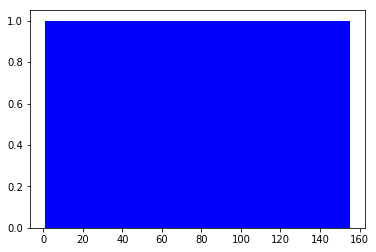

In [37]:
n, bins, patches = plt.hist(df['Positive affect'], 155, facecolor='b')
plt.show()

Частотный график Positive affect так-же показывает равномерное распределение.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [60]:
import statistics
#Т.к. в freedom есть значение NaN, я решил его очистить
freedom = df['Freedom'].dropna()
print('Медиана: ', statistics.median(freedom))

Медиана:  78.0


In [61]:
#МОДА
freedom.value_counts().head(5)
#Исходя из того, что значения не повторяются - модой являются одновременно все елементы. Или ни один :/
#И если применить скрипт из лекции по поиску моды, то мы просто получим первый элемент.

154.0    1
42.0     1
40.0     1
49.0     1
45.0     1
Name: Freedom, dtype: int64

In [63]:
#Среднее
sum(freedom)/len(freedom)

78.0

In [65]:
#Мат ожидание
statistics.mean(freedom)

78.0

In [66]:
#Стандартное отклонение
statistics.pstdev(freedom)

44.74371464239419

In [74]:
#Мин Мах
freedom.min(), freedom.max()

(1.0, 155.0)

In [75]:
#Выбросы
df['Freedom'].isnull().sum()

1

In [78]:
#Дисперсия
statistics.pvariance(freedom)

2002.0

In [79]:
#Размах
max(freedom) - min(freedom)


154.0

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [85]:
df['Positive affect'].isnull().sum(), df['Freedom'].isnull().sum()
#результат говорит о том, что мы имеем по 1 пустому значению в обоих полях.

(1, 1)

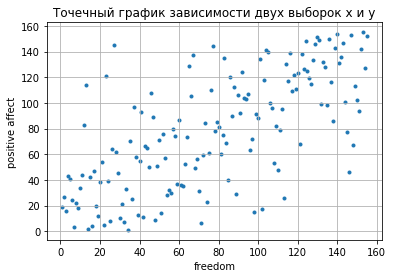

In [87]:
fr = df['Freedom'].dropna()
pa = df['Positive affect'].dropna()
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(fr, pa, marker='.')

0.6817698430601656


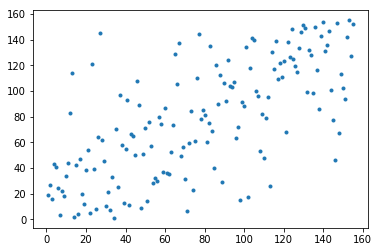

In [90]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(fr, pa)
print(corr)
plt.scatter(fr, pa, marker='.')

In [ ]:
#Коеф. корреляции по Пирсону составляет 0.68, что означает что данные достаточно коррелируют. 
#Чем выше ощущение свободы, тем больше Позитив эффекта

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [94]:
fr_norm = fr - statistics.mean(fr)

print(statistics.mean(fr_norm))

0.0


In [97]:
fr_norm.min()

-77.0

In [98]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

fr_m = min_max_scaler.fit_transform(np.array(fr_norm).reshape(-1, 1))
print(min(fr_m))
print(max(fr_m))

[-1.]
[1.]


In [100]:
fr_m

array([[-0.94805195],
       [-0.93506494],
       [-0.97402597],
       [-0.92207792],
       [-0.76623377],
       [-0.87012987],
       [-0.88311688],
       [-0.90909091],
       [-0.8961039 ],
       [-0.67532468],
       [-0.79220779],
       [-0.80519481],
       [ 0.19480519],
       [-0.64935065],
       [-0.19480519],
       [-0.58441558],
       [-0.44155844],
       [-0.32467532],
       [-0.20779221],
       [-0.25974026],
       [-0.96103896],
       [-0.85714286],
       [-0.09090909],
       [-0.11688312],
       [ 0.31168831],
       [ 0.25974026],
       [-0.68831169],
       [-0.12987013],
       [ 0.22077922],
       [-0.5974026 ],
       [ 0.07792208],
       [-0.62337662],
       [-0.75324675],
       [-0.05194805],
       [ 0.7012987 ],
       [-0.7012987 ],
       [ 0.38961039],
       [-0.35064935],
       [-0.33766234],
       [-1.        ],
       [ 0.57142857],
       [-0.28571429],
       [-0.84415584],
       [-0.1038961 ],
       [-0.36363636],
       [-0

Построить матрицу корреляций для всех колонок таблицы

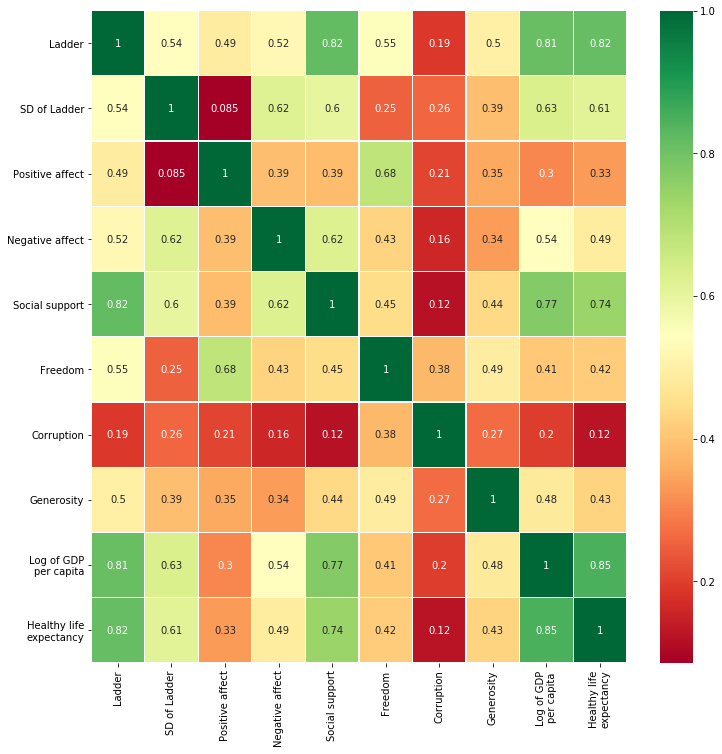

In [101]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


На таблице корреляции видно, что SD of Ladder коррелирует с Позитив ефектом, но не так-же сильно с freedom, как позитив еффект

Загрузить следующую таблицу: 

In [102]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

(array([1.020e+02, 7.260e+02, 2.135e+03, 3.152e+03, 3.069e+03, 3.109e+03,
        2.440e+03, 1.738e+03, 9.060e+02, 4.450e+02, 2.240e+02, 1.060e+02,
        6.800e+01, 2.600e+01, 3.000e+00]),
 array([0.44      , 0.62733333, 0.81466667, 1.002     , 1.18933333,
        1.37666667, 1.564     , 1.75133333, 1.93866667, 2.126     ,
        2.31333333, 2.50066667, 2.688     , 2.87533333, 3.06266667,
        3.25      ]),
 <a list of 15 Patch objects>)

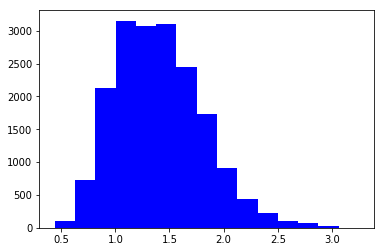

In [107]:
plt.hist(df['AveragePrice'], 15, facecolor='b')

Данное распределение больше похоже на нормальное распраделение, со сдвигом в левую сторону графика.

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Кореляция:  -0.20831704848788477


Text(0, 0.5, 'Average price')

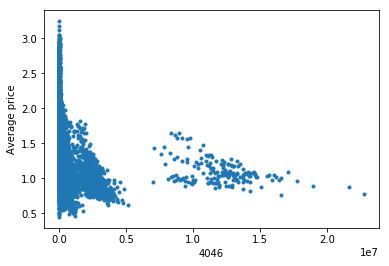

In [113]:

corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print('Кореляция: ',corr)
plt.scatter(df['4046'], df['AveragePrice'], marker='.')
plt.xlabel('4046')
plt.ylabel('Average price')

In [115]:
df['4046'].isnull().sum()
df['AveragePrice'].isnull().sum()

0

In [ ]:
есть небольшая отрицательная корреляция между проданными авокадо 4046 и средней ценой
чем больше средняя цена - тем меньше продаж данного типа авокадо